<a href="https://colab.research.google.com/github/Under-coder/ML_Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Machine Learning

Applying the following supervised machine learning algorithms to two datasets to see which gives the highest accuracy score as output:

1.   Linear Regression
2.   Multiple Regression
3.   Polynomial Regression
4.   Logistic Regression
5.   SVM (Support Vector Machine) - Regression and Classification



In [56]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#DATTSET 1
df = pd.read_csv("/content/WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [57]:
#LINEAR REGRESSION

#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

#Dataset
x = df[["chlorides"]]
y = df["quality"]

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

#algorithm
model = LinearRegression()

#Training the model
model.fit(x_train, y_train)

#testing the model
y_pred = model.predict(x_test)
MAE = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", MAE)
accu = r2_score(y_test, y_pred)
print("Accuracy score:", accu*100)

Mean absolute error: 0.6364479253984469
Accuracy score: -1.6060186883357197


In [58]:
#MULTIPLE REGRESSION

#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

#Dataset
x = df[["alcohol", "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
        "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates"]]
y = df["quality"]

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

#algorithm
model = LinearRegression()

#Training the model
model.fit(x_train, y_train)

#testing the model
y_pred = model.predict(x_test)
MAE = mean_absolute_error(y_test, y_pred)
print("Mean absolute error:", MAE)
accu = r2_score(y_test, y_pred)
print("Accuracy score:", accu*100)

Mean absolute error: 0.45626203201902277
Accuracy score: 42.695471944033194


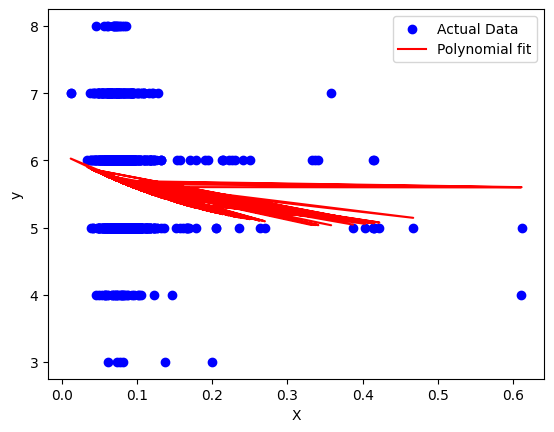

In [59]:
#POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures

#Dataset
x = df[["chlorides"]]
y = df["quality"]

#Transform the data into polynomial degree(2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

#Fit the model
model = LinearRegression()
model.fit(x_poly, y)

#prediction
y_pred = model.predict(x_poly)

#Plotting
plt.scatter(x,y, color = "blue", label='Actual Data')
plt.plot(x, y_pred, color ="red", label="Polynomial fit")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [60]:
#LOGISTIC REGRESSION

#Importing libraries

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#Datasets
x = df[["alcohol", "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
        "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates"]]
y = df["quality"]

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#Selecting model
model = LogisticRegression()

#Training the model
model.fit(x_train, y_train)

#Testing the model
y_pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

Accuracy Score: 0.5807860262008734
Confusion Matrix: [[ 0  2  4  0  0]
 [ 0 76 25  1  0]
 [ 0 34 55  4  0]
 [ 0  3 20  2  0]
 [ 0  0  1  2  0]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
#SUPPORT VECTOR MACHINE - CLASSIFICATION
from sklearn.svm import SVC

#Dataset
x = df[["alcohol", "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
        "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates"]]
y = df["quality"]

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

#selecting algorithm
model = SVC()

#Training the model
model.fit(x_train, y_train)

#Testing the model
y_pred = model.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")


Accuracy Score: 0.5065502183406113
Confusion Matrix: [[ 0  2  4  0  0]
 [ 0 39 58  0  0]
 [ 0 21 77  0  0]
 [ 0  4 22  0  0]
 [ 0  0  2  0  0]]


In [62]:
#SUPPORT VECTOR MACHINE - REGRESSION
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

#Dataset
x = df[["alcohol", "fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides",
        "density", "pH", "sulphates"]]
y = df["quality"]

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

#selecting algorithm
model = SVR()

#Training the model
model.fit(x_train, y_train)

#Testing the model
y_pred = model.predict(x_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Accuracy Score: {r2_score(y_test, y_pred)*100}")

Mean Absolute Error: 0.5121511765347707
Accuracy Score: 24.54866591568594


In [63]:
#DATASET 2

df1 = pd.read_csv("/content/Unemployment_Rate_upto_11_2020.csv")
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.740
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.740
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.740
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.740
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.740
...,...,...,...,...,...,...,...,...,...
262,West Bengal,30-06-2020,M,7.29,30726310,40.39,East,22.9868,87.855
263,West Bengal,31-07-2020,M,6.83,35372506,46.17,East,22.9868,87.855
264,West Bengal,31-08-2020,M,14.87,33298644,47.48,East,22.9868,87.855
265,West Bengal,30-09-2020,M,9.35,35707239,47.73,East,22.9868,87.855


In [64]:
#LINEAR REGRESSION

#Dataset
x = df1[[" Estimated Employed"]]
y = df1[" Estimated Unemployment Rate (%)"]

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

#Selecting algorithm
model = LinearRegression()

#Training the data
model.fit(x_train, y_train)

#Testing the data
y_pred = model.predict(x_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Accuracy Score: {r2_score(y_test, y_pred)*100}")

Mean Absolute Error: 9.136725294952798
Accuracy Score: -3.618856353153288


In [65]:
#MULTIPLE REGRESSION

#Dataset
x = df1[["longitude","latitude", " Estimated Employed", " Estimated Labour Participation Rate (%)"]]
y = df1[" Estimated Unemployment Rate (%)"]

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

#Selecting algorithm
model = LinearRegression()

#Training the data
model.fit(x_train, y_train)

#Testing the data
y_pred = model.predict(x_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Accuracy Score: {r2_score(y_test, y_pred)*100}")

Mean Absolute Error: 7.028242236663134
Accuracy Score: -0.7529692118695808


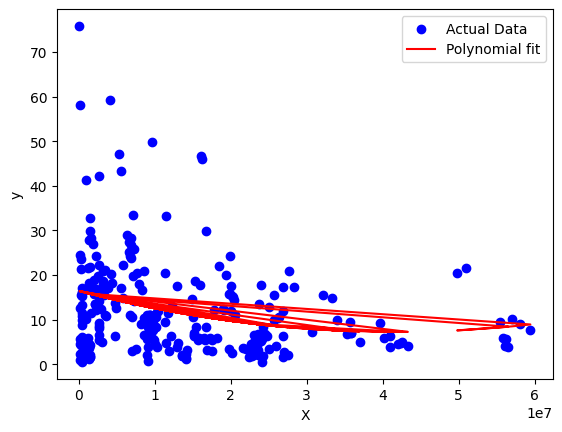

In [66]:
#POLYNOMIAL REGRESSION
from sklearn.preprocessing import PolynomialFeatures

#Dataset
x = df1[[" Estimated Employed"]]
y = df1[" Estimated Unemployment Rate (%)"]

#Transform the data into polynomial degree(2)
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

#Fit the model
model = LinearRegression()
model.fit(x_poly, y)

#prediction
y_pred = model.predict(x_poly)

#Plotting
plt.scatter(x,y, color = "blue", label='Actual Data')
plt.plot(x, y_pred, color ="red", label="Polynomial fit")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [67]:
#LOGISTIC REGRESSION

#Datasets
x = df1[['longitude','latitude', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
y = df1[" Estimated Unemployment Rate (%)"]

# Target: classify unemployment as Low (<10%) or High (>=10%)
y = (df1[" Estimated Unemployment Rate (%)"] >= 10).astype(int)

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

#Selecting model
model = LogisticRegression()

#Training the model
model.fit(x_train, y_train)

#Testing the model
y_pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")

Accuracy Score: 0.6481481481481481
Confusion Matrix: [[19  3]
 [16 16]]


In [68]:
#SUPPORT VECTOR MACHINE - CLASSIFICATION
from sklearn.svm import SVC

#Dataset
x = df1[["longitude","latitude", " Estimated Employed", " Estimated Labour Participation Rate (%)"]]
y = df1[" Estimated Unemployment Rate (%)"]

# Target: classify unemployment as Low (<10%) or High (>=10%)
y = (df1[" Estimated Unemployment Rate (%)"] >= 10).astype(int)

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

#selecting algorithm
model = SVC()

#Training the model
model.fit(x_train, y_train)

#Testing the model
y_pred = model.predict(x_test)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")


Accuracy Score: 0.6666666666666666
Confusion Matrix: [[18 12]
 [ 6 18]]


In [69]:
#SUPPORT VECTOR MACHINE - REGRESSION
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score

#Dataset
x = df1[["longitude","latitude", " Estimated Employed", " Estimated Labour Participation Rate (%)"]]
y = df1[" Estimated Unemployment Rate (%)"]

#Data splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

#selecting algorithm
model = SVR()

#Training the model
model.fit(x_train, y_train)

#Testing the model
y_pred = model.predict(x_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Accuracy Score: {r2_score(y_test, y_pred)*100}")

Mean Absolute Error: 9.251331100812653
Accuracy Score: -4.601023688903605
